In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/test.csv')
print(train.shape,test.shape)

(7352, 563) (2947, 563)


In [5]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
from sklearn.preprocessing import LabelEncoder

X_train = train.iloc[:,:-2]
Y_train = train['Activity']
le = LabelEncoder()
le.fit(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'] )
Y_train_encoded = le.transform(Y_train)

In [8]:
X_test = test.iloc[:,:-2]
Y_test = test['Activity']
Y_test_encoded = le.transform(Y_test)

## Training model using all features

In [9]:
knn.fit(X_train,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,knn.predict(X_train))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test))))

K Nearest Neighbors Train Accuracy : 0.984221980413493
K Nearest Neighbors Test Accuracy : 0.9002375296912114


## Selecting no. of neighbors

In [10]:
test_scores = []
for i in range(1,20):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,kn.predict(X_test))
    test_scores.append(acc)

([<matplotlib.axis.XTick at 0x7eff45365650>,
 <a list of 5 Text major ticklabel objects>)

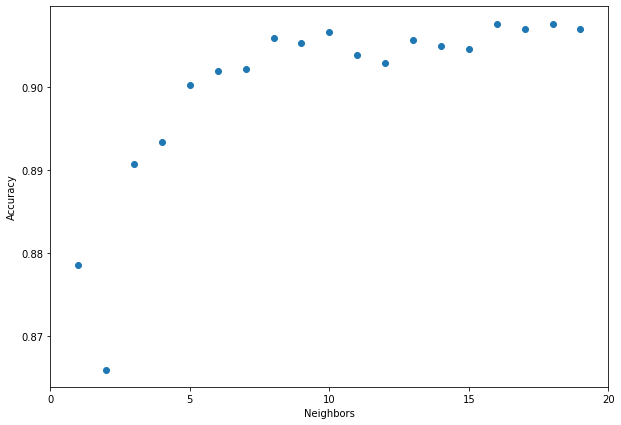

In [11]:
plt.figure(figsize=(10,7))
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.scatter(range(1,20),test_scores)
plt.xticks([0,5,10,15,20])

## Training model with 10 neighbors

In [12]:
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,kn.predict(X_train))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,kn.predict(X_test))))

K Nearest Neighbors Train Accuracy : 0.9764689880304679
K Nearest Neighbors Test Accuracy : 0.9066847641669494


In [13]:
cols = ['angle(X,gravityMean)', 'tGravityAcc-min()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-X',
        'tBodyAcc-mad()-X']
X_train = train[cols]
X_test = test[cols]
X_train.head()

,"angle(X,gravityMean)",tGravityAcc-min()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-X,tBodyAcc-mad()-X
0,-0.841247,0.977436,-0.140840,0.963396,-0.995112
1,-0.844788,0.984520,-0.141551,0.966561,-0.998807
2,-0.848933,0.986770,-0.142010,0.966878,-0.996520
3,-0.848649,0.986821,-0.143976,0.967615,-0.997099
4,-0.847865,0.987434,-0.148750,0.968224,-0.998321


In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,knn.predict(X_train))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test))))

K Nearest Neighbors Train Accuracy : 0.9534820457018498
K Nearest Neighbors Test Accuracy : 0.6963013233797082


In [15]:
train.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAYING
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1407
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,NaN
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,NaN
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,NaN
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,NaN
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,NaN
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,NaN


## PCA

In [16]:
from sklearn.decomposition import PCA
X_train = train.iloc[:,:-2]
X_test = test.iloc[:,:-2]
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape,X_train_pca.shape)
print(X_test.shape,X_test_pca.shape)

(7352, 561) (7352, 10)
(2947, 561) (2947, 10)


In [17]:
knn = KNeighborsClassifier().fit(X_train_pca,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,knn.predict(X_train_pca))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test_pca))))

K Nearest Neighbors Train Accuracy : 0.9390642002176278
K Nearest Neighbors Test Accuracy : 0.8432304038004751


In [18]:
r = range(10,251,10)
pca_scores = []
for i in r:
    pca = PCA(n_components=i,random_state=0).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn = KNeighborsClassifier().fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,knn.predict(X_test_pca))
    pca_scores.append(acc)
    print("{} : {}".format(i,acc))

10 : 0.8428910756701731
20 : 0.8595181540549711
30 : 0.8727519511367492
40 : 0.8768238887003733
50 : 0.8849677638276213
60 : 0.8900576857821514
70 : 0.8944689514760774
80 : 0.8944689514760774
90 : 0.8941296233457754
100 : 0.8954869358669834
110 : 0.8988802171700034
120 : 0.8998982015609094
130 : 0.9005768578215134
140 : 0.9012555140821175
150 : 0.9015948422124194
160 : 0.9019341703427214
170 : 0.9026128266033254
180 : 0.9026128266033254
190 : 0.9015948422124194
200 : 0.9005768578215134
210 : 0.9012555140821175
220 : 0.9002375296912114
230 : 0.9002375296912114
240 : 0.9002375296912114
250 : 0.9009161859518154


([<matplotlib.axis.XTick at 0x7eff405c17d0>,
 <a list of 25 Text major ticklabel objects>)

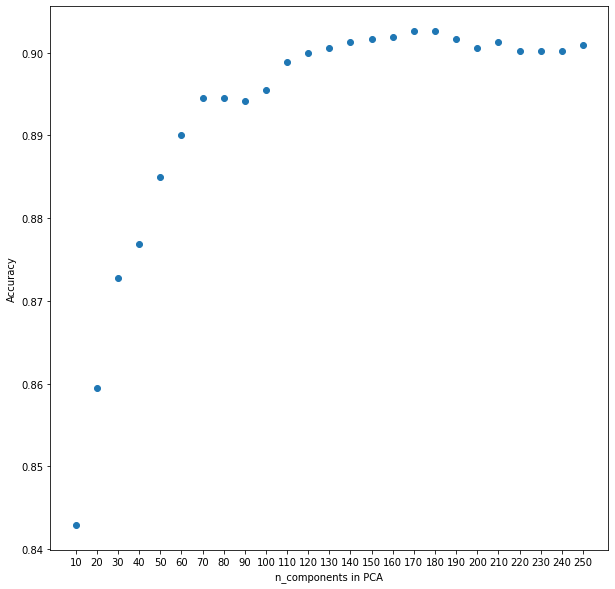

In [19]:
plt.figure(figsize=(10,10))
plt.xlabel('n_components in PCA')
plt.ylabel('Accuracy')
plt.scatter(range(10,260,10),pca_scores)
plt.xticks(range(10,260,10))

In [20]:
pca = PCA(n_components=170,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier().fit(X_train_pca,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,knn.predict(X_train_pca))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test_pca))))

K Nearest Neighbors Train Accuracy : 0.9840859630032645
K Nearest Neighbors Test Accuracy : 0.9026128266033254


In [21]:
pca_test_scores = []
for i in range(1,20):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train_pca,Y_train_encoded)
    acc = accuracy_score(Y_test_encoded,kn.predict(X_test_pca))
    pca_test_scores.append(acc)
    print("{} : {}".format(i,acc))

1 : 0.8775025449609772
2 : 0.8666440447913132
3 : 0.8934509670851714
4 : 0.8954869358669834
5 : 0.9026128266033254
6 : 0.9012555140821175
7 : 0.9022734984730234
8 : 0.9056667797760435
9 : 0.9043094672548354
10 : 0.9056667797760435
11 : 0.9032914828639295
12 : 0.9026128266033254
13 : 0.9036308109942314
14 : 0.9060061079063454
15 : 0.9039701391245334
16 : 0.9063454360366474
17 : 0.9080420766881574
18 : 0.9070240922972514
19 : 0.9053274516457415


([<matplotlib.axis.XTick at 0x7eff405bc610>,
 <a list of 4 Text major ticklabel objects>)

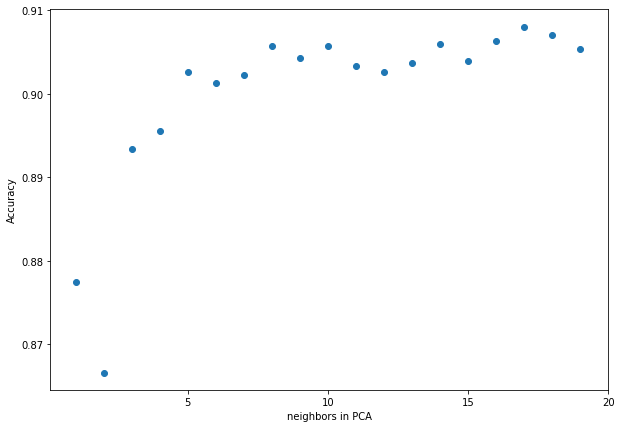

In [22]:
plt.figure(figsize=(10,7))
plt.xlabel('neighbors in PCA')
plt.ylabel('Accuracy')
plt.scatter(range(1,20),pca_test_scores)
plt.xticks(range(5,21,5))

## Training model with 17 neighbors

In [23]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_pca,Y_train_encoded)
print ("K Nearest Neighbors Train Accuracy : {}".format(accuracy_score(Y_train_encoded,knn.predict(X_train_pca))))
print ("K Nearest Neighbors Test Accuracy : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test_pca))))

K Nearest Neighbors Train Accuracy : 0.9677638737758433
K Nearest Neighbors Test Accuracy : 0.9080420766881574


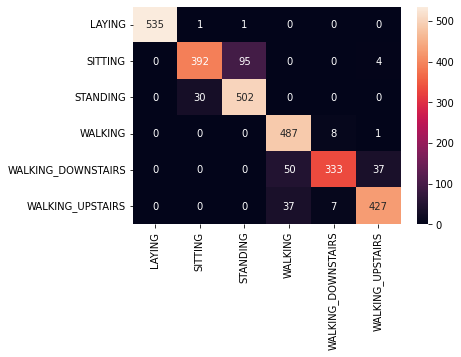

In [24]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
sns.heatmap(data=confusion_matrix(Y_test_encoded,knn.predict(X_test_pca)),
            fmt ='.0f',
            annot=True,
            xticklabels=np.unique(Y_test),
            yticklabels=np.unique(Y_test))

In [25]:
print ("Accuracy Score : {}".format(accuracy_score(Y_test_encoded,knn.predict(X_test_pca))))
print ("Precision Score: {}".format(precision_score(Y_test_encoded,knn.predict(X_test_pca),average='macro')))
print ("Recall Acore : {}".format(recall_score(Y_test_encoded,knn.predict(X_test_pca),average='macro')))
print ("F1 Score : {}".format(f1_score(Y_test_encoded,knn.predict(X_test_pca),average='macro')))

Accuracy Score : 0.9080420766881574
Precision Score: 0.9136591999334974
Recall Acore : 0.9032581704019615
F1 Score : 0.9050627447042512


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_encoded,knn.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.80      0.86       491
           2       0.84      0.94      0.89       532
           3       0.85      0.98      0.91       496
           4       0.96      0.79      0.87       420
           5       0.91      0.91      0.91       471

    accuracy                           0.91      2947
   macro avg       0.91      0.90      0.91      2947
weighted avg       0.91      0.91      0.91      2947

